In [ ]:
import pandas as pd 
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
gpu_folders = pd.Series(glob('/home/motion/Joao/Papers/IROS 2025/gpu_mem-20250228T050518Z-001/gpu_mem/**/gpu_memory_usage.npy',recursive = True))

custom_params = {"axes.spines.right": False, "axes.spines.top": False,'font.weight':'bold',"axes.labelweight":'bold'}
sns.set_theme(style="whitegrid", palette="colorblind",rc = custom_params)

In [ ]:
translation_dict = {'Segformer Naive Bayesian':'RBU', 'Segformer Naive Averaging':'NA',
       'Segformer Encoded Averaging4':'EF-4', 'Segformer topk2':'CTKH-2',
       'Segformer Histogram':'Hist', 'Segformer Encoded Averaging2':'EF-2',
       'Segformer topk8':'CTKH-8', 'Segformer Encoded Averaging8':'EF-8',
       'Segformer topk4':'CTKH-4'}

exp_name_to_type = {'CTKH-2':'hist','CTKH-4':'hist','CTKH-8':'hist','EF-2':'avg','EF-4':'avg','EF-8':'avg','Hist':'hist','RBU':'bayes','NA':'avg'}

In [ ]:
tmp = gpu_folders.str.split('/',expand = True)
experiment_names = tmp.iloc[:,-3]
scene_names = tmp.iloc[:,-2]
dfs = []

for folder,experiment,scene in tqdm(zip(gpu_folders.values,experiment_names.values,scene_names.values)):
    data = np.load(folder)-1.3
    tmp_df = pd.DataFrame({'GPU usage':data})
    exp = translation_dict[experiment]
    kind = exp_name_to_type[exp]
    tmp_df.loc[:,'experiment'] = translation_dict[experiment]
    tmp_df.loc[:,'scene'] = scene
    tmp_df.loc[:,'kind'] = kind
    dfs.append(tmp_df)

In [ ]:
all_dfs= pd.concat(dfs)

max_dfs = all_dfs.groupby(by = ['scene']).max().reset_index()
max_dfs.rename(columns = {'GPU usage':'Max Usage'},inplace = True)
max_dfs.drop(columns = ['experiment','kind'],inplace = True)

all_dfs = pd.merge(all_dfs,max_dfs,how = 'left', on ='scene')
all_dfs.loc[:,'GPU Usage Ratio'] = 100*all_dfs.loc[:,'GPU usage']/all_dfs.loc[:,'Max Usage']
max_ratios = all_dfs.groupby(by = ['experiment','scene']).max().reset_index()

In [ ]:
max_ratios

In [ ]:
plt.figure(figsize = (7,3))
order = ['RBU','CTKH-2','CTKH-4','CTKH-8','Hist','EF-2','EF-4','EF-8','NA']

ax = sns.violinplot(max_ratios,x = 'experiment',y = 'GPU Usage Ratio', order = order, hue = 'kind',hue_order =['avg','bayes','hist'])
plt.xlabel('')
plt.ylabel('VRAM Usage Ratio (% of NA)')
ax.legend().remove()
ax.grid(visible = False)
plt.savefig('./figures/gpu_memory_usage_ratios.pdf',bbox_inches = 'tight')

# Doing the same for frame timings:

In [ ]:
import pandas as pd 
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
gpu_folders = pd.Series(glob('/home/motion/Joao/Papers/IROS 2025/update_times-20250228T050513Z-001/update_times/**/reconstruction_times.npy',recursive = True))

custom_params = {"axes.spines.right": False, "axes.spines.top": False,'font.weight':'bold',"axes.labelweight":'bold'}
sns.set_theme(style="whitegrid", palette="colorblind",rc = custom_params)
translation_dict = {'Segformer Naive Bayesian':'RBU', 'Segformer Naive Averaging':'NA',
       'Segformer Encoded Averaging4':'EF-4', 'Segformer topk2':'CTKH-2',
       'Segformer Histogram':'Hist', 'Segformer Encoded Averaging2':'EF-2',
       'Segformer topk8':'CTKH-8', 'Segformer Encoded Averaging8':'EF-8',
       'Segformer topk4':'CTKH-4'}

exp_name_to_type = {'CTKH-2':'hist','CTKH-4':'hist','CTKH-8':'hist','EF-2':'avg','EF-4':'avg','EF-8':'avg','Hist':'hist','RBU':'bayes','NA':'avg'}


In [ ]:
tmp = gpu_folders.str.split('/',expand = True)
experiment_names = tmp.iloc[:,-3]
scene_names = tmp.iloc[:,-2]
dfs = []

for folder,experiment,scene in tqdm(zip(gpu_folders.values,experiment_names.values,scene_names.values)):
    data = np.load(folder)
    tmp_df = pd.DataFrame({'frame timings':data})
    exp = translation_dict[experiment]
    kind = exp_name_to_type[exp]
    tmp_df.loc[:,'experiment'] = translation_dict[experiment]
    tmp_df.loc[:,'scene'] = scene
    tmp_df.loc[:,'kind'] = kind
    dfs.append(tmp_df)

In [ ]:
plt.figure(figsize = (7,3))

all_dfs= pd.concat(dfs)
order = ['RBU','CTKH-2','CTKH-4','CTKH-8','Hist','EF-2','EF-4','EF-8','NA']

ax = sns.boxplot(data = all_dfs,x = 'experiment',y = 'frame timings',hue = 'kind',showfliers = False,order= order, whis = [5,95],hue_order =['avg','bayes','hist'])
plt.ylabel('Time per frame (s)')
plt.xlabel('')
ax.legend().remove()
ax.grid(visible = False)

plt.savefig('./figures/frame_times.pdf',bbox_inches = 'tight')

In [ ]:
all_dfs

# Creating the Scannet Results plot

In [167]:
import pandas as pd 
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
custom_params = {"axes.spines.right": False, "axes.spines.top": False,'font.weight':'bold',"axes.labelweight":'bold'}
sns.set_theme(style="whitegrid", palette="colorblind",rc = custom_params)

# exp_name_to_type = {'CTKH-1':'hist','CTKH-2':'hist','CTKH-3':'hist','CTKH-4':'hist','EF-2':'avg','EF-4':'avg','EF-8':'avg','Hist':'hist','RBU':'bayes','NA':'avg'}

# order2 = ['RBU','CTKH-1','CTKH-2','CTKH-3','CTKH-4','Hist','EF-2','EF-4','EF-8','NA']
# order1 = ['RBU','CTKH-2','CTKH-4','Hist','EF-2','EF-4','NA']
exp_name_to_type = {'CTKH-1':'hist','CTKH-2':'hist','CTKH-3':'hist','CTKH-4':'hist',
                    'CTKH-8':'hist','EF-2':'avg','EF-4':'avg','EF-8':'avg','Hist':'hist','RBU':'bayes',
                    'NA':'avg','MG-2':'hist','MG-4':'hist','MG-8':'hist','KH-2':'hist','KH-4':'hist','KH-8':'hist'}

order3 = ['RBU','CTKH-2','MG-2','KH-2','CTKH-4','MG-4','KH-4','MG-8','KH-8','Hist','EF-2','EF-4','EF-8','NA']


def process_iou_df(filename,model_type):
    ious = pd.read_excel(filename)
    ious.rename(columns = {'experiments':'method'},inplace = True)
    ious.loc[0,'method'] = 'NA'
    kind = []
    for tmp in ious.method.values:
        kind.append(exp_name_to_type[tmp])
    ious.loc[:,'kind'] = kind
    ious.loc[:,'model'] = model_type
    return ious

# esanet_df = process_iou_df('/home/motion/Joao/Papers/IROS 2025/scannet_results/ESANET/3D IoUs.xlsx','ESANet')
segformer_df = process_iou_df('/home/motion/Joao/Papers/IROS 2025/scannet_results/combined/3D IoUs.xlsx','Segformer')

final_df = pd.concat([esanet_df,segformer_df])

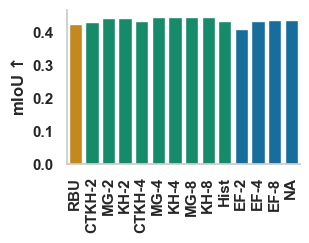

In [168]:
plt.figure(figsize = (3,2))
# ious = pd.read_excel('/home/motion/Joao/Papers/IROS 2025/scannet_results/3D IoUs.xlsx')
# ious.rename(columns = {'experiments':'method'},inplace = True)
# ious.loc[0,'method'] = 'NA'
# kind = []
# for tmp in ious.method.values:
#     print(tmp)
#     kind.append(exp_name_to_type[tmp])
# ious.loc[:,'kind'] = kind

ax = sns.barplot(segformer_df,x = 'method',y = 'mIoU',hue = 'kind',order = order3)

plt.xlabel('')
plt.ylabel('mIoU$\\uparrow$')
ax.legend().remove()
ax.grid(visible = False)
plt.xticks(rotation=90)
plt.savefig('./figures/ScanNet Segformer mIoUs.pdf',bbox_inches = 'tight')

In [169]:
axes.axes[0][0]

AttributeError: 'numpy.ndarray' object has no attribute 'axes'

In [ ]:
ious

# Now for the Eces

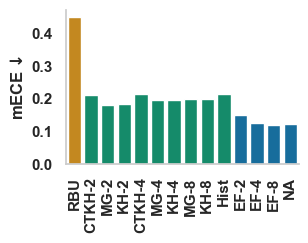

In [170]:
plt.figure(figsize = (3,2))

ious = pd.read_excel('/home/motion/Joao/Papers/IROS 2025/scannet_results/combined/ECEs by class and experiment_alt_finetuned.xlsx')
ious.rename(columns = {'experiments':'method'},inplace = True)
ious.loc[0,'method'] = 'NA'
kind = []
for tmp in ious.method.values:
    kind.append(exp_name_to_type[tmp])
ious.loc[:,'kind'] = kind

ax = sns.barplot(ious,x = 'method',y = 'mECE -all',hue = 'kind',order = order3)

plt.xlabel('')
plt.ylabel('mECE$\\downarrow$')
ax.legend().remove()
ax.grid(visible = False)
plt.xticks(rotation=90)
plt.savefig('./figures/ScanNet mECEs Segformer.pdf',bbox_inches = 'tight')

# and Brier Scores

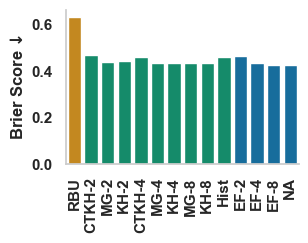

In [171]:
plt.figure(figsize = (3,2))

ious = pd.read_excel('/home/motion/Joao/Papers/IROS 2025/scannet_results/combined/brier_scores.xlsx')
ious.rename(columns = {'experiments':'method'},inplace = True)
ious.loc[0,'method'] = 'NA'
kind = []
for tmp in ious.method.values:
    kind.append(exp_name_to_type[tmp])
ious.loc[:,'kind'] = kind

ax = sns.barplot(ious,x = 'method',y = 'Brier',hue = 'kind',order = order3)

plt.xlabel('')
plt.ylabel('Brier Score$\\downarrow$')
ax.legend().remove()
ax.grid(visible = False)
plt.xticks(rotation=90)
plt.savefig('./figures/ScanNet Segformer Brier Scores.pdf',bbox_inches = 'tight')

# Now creating the effect of calibration figure

In [1]:
import pandas as pd 
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

custom_params = {"axes.spines.right": False, "axes.spines.top": False,'font.weight':'bold',
                 "axes.labelweight":'bold','font.size':20,'axes.labelsize':16, 'xtick.labelsize':14,'ytick.labelsize':14}
sns.set_theme(style="whitegrid", palette="colorblind",rc = custom_params)

df = pd.read_excel('/home/motion/Joao/Papers/IROS 2025/effect of calibration correction/effect_of_calibration_correction.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/home/motion/Joao/Papers/IROS 2025/effect of calibration correction/effect_of_calibration_correction.xlsx'

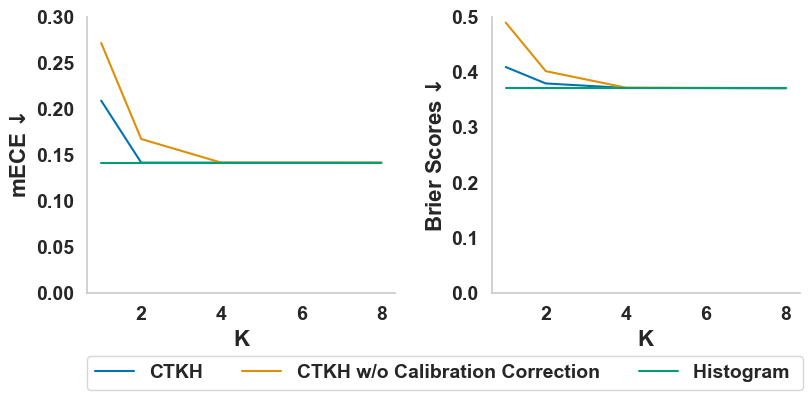

In [36]:
fig,axes = plt.subplots (1,2,figsize= (10,4))
sns.lineplot(df,x = 'K',y = 'mECE',hue = 'Fusion technique',ax = axes[0])
sns.lineplot(df,x = 'K',y = 'Brier Scores',hue = 'Fusion technique',ax = axes[1])

axes[0].set_ylim(0,0.3)
axes[0].set_ylabel('mECE$\\downarrow$')
axes[1].set_ylim(0,0.5)
axes[1].set_ylabel('Brier Scores$\\downarrow$')
axes[1].get_legend().remove()
axes[0].grid(visible = False)
axes[1].grid(visible= False)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center',ncol = 3,bbox_to_anchor = (0.465,-0.05),fontsize = 14)
axes[0].get_legend().remove()
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('./figures/effect_of_calibration_correction.pdf',bbox_inches = 'tight')

# Fixing the formatting of the agreement stats:

In [6]:
import pandas as pd
import numpy as np 

df = pd.read_csv('/home/motion/Joao/Papers/IROS 2025/mean_per_class_agreement_hist_filtered.csv')

In [7]:
new_df = pd.pivot_table(df,values = 'Mean Per-Class Agreement %', index = 'Technique',columns = 'Scene')
new_df.to_excel('/home/motion/Joao/Papers/IROS 2025/pivoted_agreement_hist.xlsx')
new_df

Scene,cafeteria,campus,central,corridor,dining,foobar,hub,juice,lounge,study,waiting
Technique,,,,,,,,,,,
Maskformer Encoded Averaging4,98.078838,76.206647,82.854441,100.000000,72.064098,99.408047,99.377189,100.000000,99.999831,100.00000,99.999454
Maskformer Naive Bayesian,99.960267,93.226887,67.908859,100.000000,79.249466,99.940504,99.371237,99.999816,99.941995,99.99905,100.000000
Maskformer topk4,99.042161,74.655304,97.008140,99.957895,93.407463,98.420995,99.999919,100.000000,98.928465,100.00000,100.000000


# Now creating the Scannet++ Results

In [14]:
import pandas as pd 
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

custom_params = {"axes.spines.right": False, "axes.spines.top": False,'font.weight':'bold',"axes.labelweight":'bold'}
sns.set_theme(style="whitegrid", palette="colorblind",rc = custom_params)

exp_name_to_type = {'CTKH-1':'hist','CTKH-2':'hist','CTKH-3':'hist','CTKH-4':'hist',
                    'CTKH-8':'hist','EF-2':'avg','EF-4':'avg','EF-8':'avg','Hist':'hist','RBU':'bayes',
                    'NA':'avg','MG-2':'hist','MG-4':'hist','MG-8':'hist','KH-2':'hist','KH-4':'hist','KH-8':'hist'}

# order = ['RBU','CTKH-2','MG-2','KH-2','CTKH-4','MG-4','KH-4','CTKH-8','MG-8','KH-8','Hist','EF-2','EF-4','EF-8','NA']
# order = ['CTKH-4','CTKH-2','EF-2','EF-4','Hist','RBU','NA']
order = ['RBU','CTKH-2','CTKH-4','CTKH-8','Hist','EF-2','EF-4','EF-8','NA']


Index(['experiments', 'mIoU'], dtype='object')
NA
RBU
Hist
CTKH-2
CTKH-4
CTKH-8
EF-2
EF-4
EF-8
EF-8


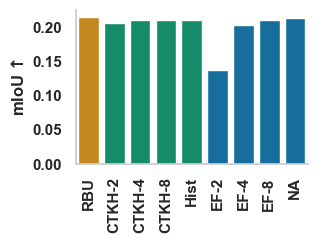

In [21]:
plt.figure(figsize = (3,2))
ious = pd.read_excel('C:/Users/valla/research_code/iros2025figuregen/3D IoUs.xlsx')
print(ious.columns)
ious.rename(columns = {'experiments':'method'},inplace = True)
ious.loc[0,'method'] = 'NA'
kind = []
for tmp in ious.method.values:
    print(tmp)
    kind.append(exp_name_to_type[tmp])
ious.loc[:,'kind'] = kind

ax = sns.barplot(ious,x = 'method',y = 'mIoU',hue = 'kind',order = order, dodge = False)

plt.xlabel('')
plt.ylabel('mIoU$\\uparrow$')
ax.legend().remove()
ax.grid(visible = False)
plt.xticks(rotation=90)
plt.savefig('ScanNetpp Segformer mIoUs.png',bbox_inches = 'tight')

# Now for the Eces

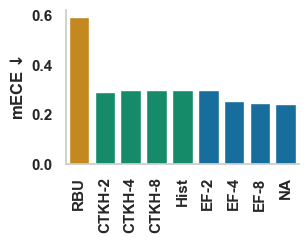

In [23]:
plt.figure(figsize = (3,2))

ious = pd.read_excel('C:/Users/valla/research_code/iros2025figuregen/ECEs by class and experiment_alt_finetuned.xlsx')
ious.rename(columns = {'experiments':'method'},inplace = True)
ious.loc[0,'method'] = 'NA'
kind = []
for tmp in ious.method.values:
    kind.append(exp_name_to_type[tmp])
ious.loc[:,'kind'] = kind

ax = sns.barplot(ious,x = 'method',y = 'mECE -all',hue = 'kind',order = order, dodge = False)

plt.xlabel('')
plt.ylabel('mECE$\\downarrow$')
ax.legend().remove()
ax.grid(visible = False)
plt.xticks(rotation=90)
plt.savefig('ScanNetpp mECEs Segformer.png',bbox_inches = 'tight')

# and Brier Scores

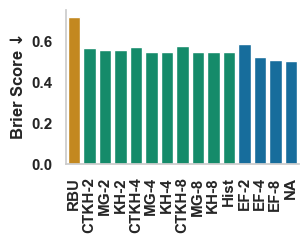

In [ ]:
plt.figure(figsize = (3,2))

ious = pd.read_excel('C:/Users/valla/research_code/iros2025figuregen/brier_scores.xlsx')
ious.rename(columns = {'experiments':'method'},inplace = True)
ious.loc[0,'method'] = 'NA'
kind = []
for tmp in ious.method.values:
    kind.append(exp_name_to_type[tmp])
ious.loc[:,'kind'] = kind

ax = sns.barplot(ious,x = 'method',y = 'Brier',hue = 'kind',order = order, dodge = False)

plt.xlabel('')
plt.ylabel('Brier Score$\\downarrow$')
ax.legend().remove()
ax.grid(visible = False)
plt.xticks(rotation=90)

plt.savefig('ScanNetpp Segformer Brier Scores.png',bbox_inches = 'tight')

In [46]:
round(3.5)

4

NameError: name 'ceiling' is not defined

In [145]:
class Solution:
    def reorderList(self, head: Optional[ListNode]) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        pointers_list = []
        next_node = head.next
        pointers_list.append(next_node)
        while(next_node is not None):
            pointers_list.append(next_node.next)
            next_node = next_node.next
        # now that we have the pointers list, we can just change the next pointers in reverse order
        head.next = pointers_list[-2]
        next_node = head.next
        for node,inv_node in zip(pointers_list[:len(pointers_list)//2],pointers_list[len(pointers_list)//2:][::-1]):
            next_node.next = node
            next_node = node
            next_node.next = inv_node
            next_node = inv_node

In [146]:
threeSum([-1,0,1,2,-1,-4])

0 0 0
6 5 5
0 0 1
6 5 5
0 0 2
6 5 5
0 0 3
6 5 5
0 0 4
6 5 5
0 1 0
6 5 4
0 1 1
6 5 4
0 1 2
6 5 4
0 1 3
6 5 4
0 2 0
6 5 3
0 2 1
6 5 3
0 2 2
6 5 3
0 3 0
6 5 2
0 3 1
6 5 2
0 4 0
6 5 1
1 0 0
6 4 5
1 0 1
6 4 5
1 0 2
6 4 5
1 0 3
6 4 5
1 0 4
6 4 5
1 1 0
6 4 4
1 1 1
6 4 4
1 1 2
6 4 4
1 1 3
6 4 4
1 2 0
6 4 3
1 2 1
6 4 3
1 2 2
6 4 3
1 3 0
6 4 2
1 3 1
6 4 2
2 0 0
6 3 5
2 0 1
6 3 5
2 0 2
6 3 5
2 0 3
6 3 5
2 0 4
6 3 5
2 1 0
6 3 4
2 1 1
6 3 4
2 1 2
6 3 4
2 1 3
6 3 4
2 2 0
6 3 3
2 2 1
6 3 3
2 2 2
6 3 3
3 0 0
6 2 5
3 0 1
6 2 5
3 0 2
6 2 5
3 0 3
6 2 5
3 0 4
6 2 5
3 1 0
6 2 4
3 1 1
6 2 4
3 1 2
6 2 4
3 1 3
6 2 4
4 0 0
6 1 5
4 0 1
6 1 5
4 0 2
6 1 5
4 0 3
6 1 5
4 0 4
6 1 5


[[-4, 2, 2], [-1, -1, 2], [-1, 0, 1], [-1, 1, 0], [0, 1, -1]]

In [152]:
tmp = ['a','b','c']
for i,j in enumerate(tmp):
    print(i,j)

0 a
1 b
2 c


In [153]:
s = Solution()
s.maxArea(height)

15252

In [154]:
height[4],height[94]
90*165

14850

In [175]:
import heapq

In [185]:
a = np.arange(10).tolist()

In [186]:
heapq.heapify(a)

In [277]:
from collections import deque
import time
def combinationSum(candidates, target):
        candidates.sort()

        valid_outputs = set({})
        rounds = 0
        for basenum in range(len(candidates)):
            tentative_sums = deque([candidates[basenum]])
            sum_val = candidates[basenum]
            i = basenum
            k = 0
            while(len(tentative_sums)>0):
                start = tentative_sums.copy()
                while(sum_val<target):
                    tentative_sums.append(candidates[i])
                    print(tentative_sums)

                    sum_val += candidates[i]
                if(sum_val == target):
                    valid_outputs.add(tuple(tentative_sums))
                last_val = tentative_sums.pop()
                sum_val -=last_val
                if(len(tentative_sums)>0):
                    last_val = tentative_sums.pop()
                    sum_val -= last_val
                i+=1
                if(i == len(candidates)):
                    if(len(tentative_sums)>0):
                                            
                        k +=1

                    #     last_val = tentative_sums.pop()
                    #     sum_val -= last_val
                    i = basenum+k
                                
        return list(valid_outputs)

In [278]:
res = combinationSum([2,3,5],8)
res

deque([2, 2])
deque([2, 2, 2])
deque([2, 2, 2, 2])
deque([2, 2, 3])
deque([2, 2, 3, 3])
deque([2, 2, 5])
deque([2, 3])
deque([2, 3, 3])
deque([2, 5])
deque([2, 5, 5])
deque([2, 5])
deque([2, 5, 5])


IndexError: list index out of range